<a href="https://colab.research.google.com/github/vikhyat-3/AI-ML-Hackathon/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed cleveland.csv')

In [72]:
df

,Age,Sex,CP,Trestbps,Cholestrol,FBS,RestCG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Removing null values and replacing them with the modes of respective columns

In [73]:
df=df.replace('?',np.NaN)
for i in df:
  df[i].fillna(df[i].mode()[0], inplace=True)
df

,Age,Sex,CP,Trestbps,Cholestrol,FBS,RestCG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Converting all num values >=1 to 1 for simplicity. (The dataset description said 0 or 1,but 0,1,2,3,4 were present. 1,2,3,4 all indicate the presence of heart disease,hence simply converting all 2,3,4 to 1)

In [78]:
for i in range(len(df['num'])):
  if df['num'][i] >=2:
    df['num'][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
df

,Age,Sex,CP,Trestbps,Cholestrol,FBS,RestCG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Splitting the DataFrame into test and train values. Num is the result, and hence we will first drop it and store remaining DF in X We will store the values of num itself in Y.

In [87]:
X=df.drop('num',axis='columns')
Y=df.num
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print((X_train).shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(227, 13) (76, 13)
(227,) (76,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)*100

89.47368421052632


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [90]:
print(accuracy)

89.47368421052632


PRECISION:  0.8918918918918919 
RECALL 0.8918918918918919 
F1 Score: 89.19 %


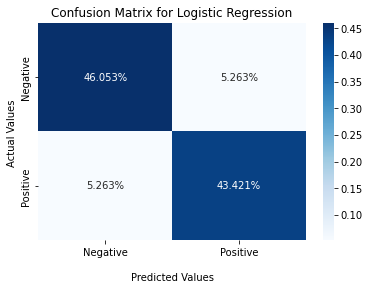

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
cm=confusion_matrix(Y_test,Y_pred)
tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=f1_score(Y_test,Y_pred,average='binary')*100
f1="{:.2f}".format(f1)
print('PRECISION: ',precision,'\nRECALL',recall,'\nF1 Score:',f1,'%')
ax = sns.heatmap(cm/np.sum(cm),fmt='.3%', annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()